In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df = df.dropna()
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [3]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)

In [6]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [11]:
# With statsmodels
model = SimpleExpSmoothing(df['Thousands of Passengers'])
model.fit()
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [13]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [14]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:xlabel='Month'>

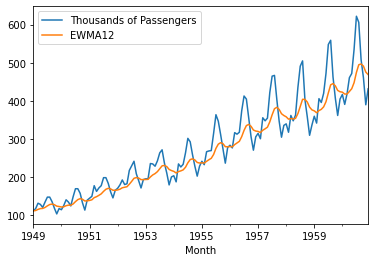

In [16]:
df.plot()


In [19]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], 
                                       trend='add').fit().fittedvalues.shift(-1)

In [20]:
df.head()

,Thousands of Passengers,EWMA12,DES_add_12
Month,,,
1949-01-01,112,112.000000,113.474833
1949-02-01,118,112.923077,119.464371
1949-03-01,132,115.857988,133.477565
1949-04-01,129,117.879836,130.543317
1949-05-01,121,118.359861,122.528131


In [21]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'DES_add_12'], dtype='object')

<AxesSubplot:xlabel='Month'>

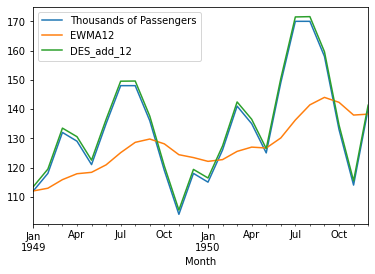

In [26]:
df[['Thousands of Passengers', 'EWMA12', 'DES_add_12']].iloc[:24].plot()

In [28]:
# Bring in triple exponential smoothing
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',
                                       seasonal='mul', seasonal_periods=12).fit().fittedvalues

In [29]:
df

,Thousands of Passengers,EWMA12,DES_add_12,TES_mul_12
Month,,,,
1949-01-01,112,112.000000,113.474833,111.597075
1949-02-01,118,112.923077,119.464371,118.842736
1949-03-01,132,115.857988,133.477565,133.335224
1949-04-01,129,117.879836,130.543317,127.900043
1949-05-01,121,118.359861,122.528131,120.979136
...,...,...,...,...
1960-08-01,606,494.898619,608.663526,629.400971
1960-09-01,508,496.914216,510.647752,511.999881
1960-10-01,461,491.388952,463.183517,448.034648


<AxesSubplot:xlabel='Month'>

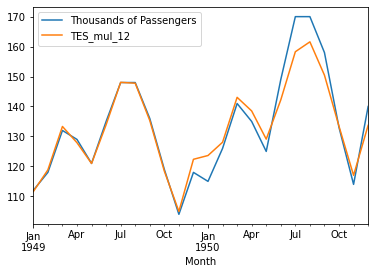

In [32]:
df[['Thousands of Passengers', 'TES_mul_12']].iloc[:24].plot()